In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [2]:
X = X[y != 2]
y = y[y != 2]

In [3]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 1, 16)

In [8]:
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        fit_intercept=False,
    ),
)
coefs_ = []
for c in cs:
    clf.set_params(logisticregression__C=c)
    clf.fit(X, y)
    coefs_.append(clf["logisticregression"].coef_.ravel().copy())

coefs_ = np.array(coefs_)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warni

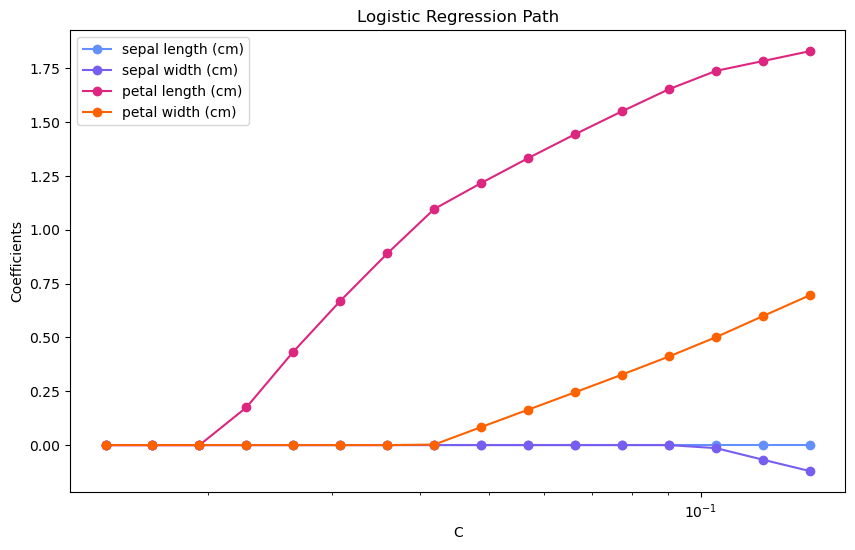

In [7]:
import matplotlib.pyplot as plt

# Colorblind-friendly palette (IBM Color Blind Safe palette)
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100"]

plt.figure(figsize=(10, 6))
for i in range(coefs_.shape[1]):
    plt.semilogx(cs, coefs_[:, i], marker="o", color=colors[i], label=feature_names[i])

ymin, ymax = plt.ylim()
plt.xlabel("C")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.legend()
plt.axis("tight")
plt.show()

# Respuestas
1. ¿Qué observas en la trayectoria de regularización cuando aumentas la fuerza de regularización?
   Cuando se disminuye C, los coeficientes se reducen. Con L1 los coeficientes se vuelven cero, eso quiere decir que eliminamos variables menos útiles.
   
2. ¿Cómo afectan los diferentes niveles de regularización a los coeficientes del modelo?
Con poca regularización los coeficientes pueden crecer y el modelo usa más variables. Con mucha regularización, los coeficientes se encogen, y con L1 muchas variables quedan con coeficiente 0.

3. ¿Qué patrones de cambio en los coeficientes puedes identificar?

Algunas variables le cuesta más la regularización, es decir, mantienen coeficientes distintos de cero por más tiempo. 

4. ¿Cómo podrías utilizar la trayectoria de regularización para seleccionar la fuerza deregularización óptima?
Se puede usar la trayectoria para identificar el punto en el que el modelo deja de cambiar de forma significativa. 

5. ¿Qué impacto tiene la regularización en la capacidad del modelo para generalizar?

Ayuda a que el modelo generalice mejor al reducir el sobreajuste, haciendo que el modelo sea más simple y estable.